---
# Lecture 9: Introduction to Machine Learning in Python
---

## 1. Introduction <a id='l_overview'></a>

This lecture was created as part of a CPS Teaching Fellowship. We are introducing a novel approach to study advanced scientific programming. The goal of today's lecture is to present unsupervised Machine Learning. We will learn about the most typical machine learning problems, such as dimensionality reduction, and how to approach these using the Python programmming language. These are the important concepts that we will cover:

- [Machine Learning](#l_ml)
- [Data sets](#l_ds)
- [Dimensionality reduction](#l_dr) 
- [Principal Component Analysis (PCA)](#l_pca)
- [Multidimensional Scaling (MDS)](#l_mds)
- [Other dimensionality reduction techniques](#l_other)


## 2. Machine Learning <a id='l_ml'></a>

Below is the outline of the field with specific algorithms:

1. **Unsupervised Learning** - there is no correct input/output pair 
    - *Clustering*
        - K-Means
        - Hierarchical
        - Spectral
    - *Dimensionality reduction*
        - Principal Components Analysis (PCA)
        - Multidimensional Scaling (MDS)
        - Stochastic Neighbour Embedding (t-SNE)
        - Uniform Manifold Approximation and Projection (UMAP)
        
        
2. **Supervised Learning** - there is a correct input/output pair
    - *Regression*
        - Curve fitting
        - Linear regression 
    - *Classification*
        - Linear Classifiers (Support Vector Machines, Logistic regression)
        - Decision Trees
        - Neural Networks
        
        
3. **Reinforcement Learning** - is an area concerned with how software agents have to take actions in an environment so as to maximize some cumulative reward



## 3. Generating data sets

Setup:
- Suppose one has $p$ samples of N-dimensional data points, $x_i\in\mathbb{R}^N$
- Store these samples columnwise as $X\in\mathbb{R}^{p\,\times\,N}$
- We call this the original data matrix, or simply the data
- Assumption: there is a meaningful metric (e.g. Euclidean distance) on the data space (high dim)
- Assumption: there is a meaningful metric (e.g. Euclidean distance) on the latent space (low dim)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')

Generate linear data with noise ( 2-dimensional data set):

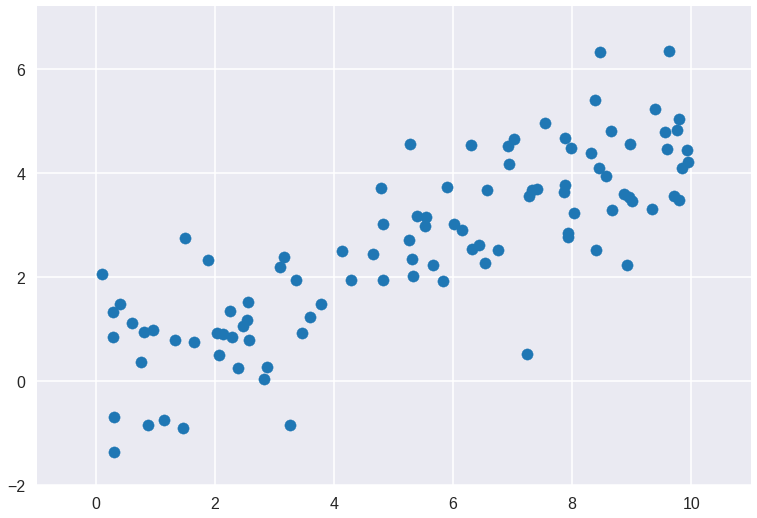

In [2]:
plt.style.use('seaborn-poster')

raw_data_x = np.random.uniform(0,10, size=(100,))
raw_data_y = 0.5 * raw_data_x + np.random.normal(0,1,len(raw_data_x))

X_2d = np.empty((100, 2))
X_2d[:,0] = raw_data_x
X_2d[:,1] = raw_data_y

#plt.figure(figsize=(12,8))
plt.scatter(X_2d[:,0], X_2d[:,1])
plt.xlim(-1, 11)
plt.ylim(-2, 7.2)
plt.show()

Let's look how the data looks like (first 10 points):

In [3]:
X_2d[:10]

array([[8.38629132, 5.40516483],
       [5.89092707, 3.71769437],
       [7.2407039 , 0.51934862],
       [0.76287794, 0.35528216],
       [2.28535297, 0.84160329],
       [2.87893428, 0.25883916],
       [2.81478537, 0.03211487],
       [5.31879402, 2.0090268 ],
       [6.9224401 , 4.51515972],
       [8.57051303, 3.936055  ]])

Load some high-dimensional data from the [MNIST](https://en.wikipedia.org/wiki/MNIST_database) dataset. 
![](pics/mnist.png)

In [4]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, x_test.shape, y_train.shape, y_test.shape

/home/klyshko/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

Let's take only 1000 data points

In [5]:
X = x_test[:1000]
Y = y_test[:1000]

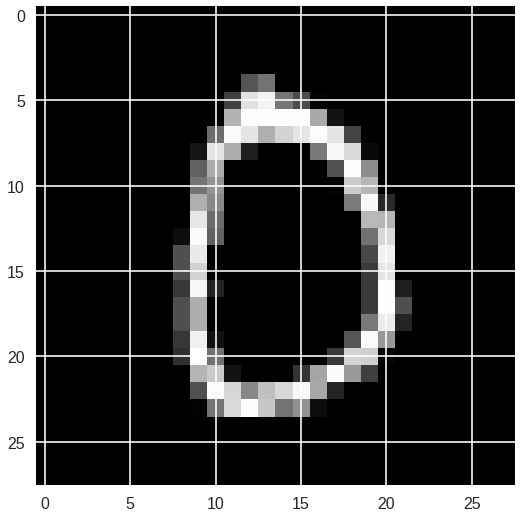

In [6]:
plt.imshow(X[567], cmap='gray')
plt.show()

We want to convert each data point (picture with a handwritten digit) to a vector which dimensionality is 28x28 = 784

In [7]:
X = X.reshape(1000, 784)
X[567].shape

(784,)

**Summary** - we have two data sets:
- Two-dimensional data set with 100 points
- 768-dimensional data set with 1000 points

## 4. Dimensionality reduction <a id='l_dr'></a>
Dimensionality reduction is the process of reducing the number of dimensions under consideration by obtaining a set of principal variables. You can select a subset of original variables, or find a linear or nonlinear combination of features, or make a projection to lower dimensions. 

![](pics/dr.png)


Methods:
- **Principal Components Analysis (PCA)** - linear method to extract dimensions with the highest variance
- **Multidimensional Scaling (MDS)** - nonlinear method to project in lower dimensions by saving pairwise distances
- **Stochastic Neighbour Embedding (t-SNE)** - making an embedding in lower dimensions by conserving distribution of distances 
- **Uniform Manifold Approximation and Projection (UMAP)** - projecting the data on manifold into fewer dimensions

## 5. Principal Component Analysis <a id='l_dr'></a>

**Math**:

- PCA goal: Find orthogonal transformation $W$ of centered data $X_c$ (i.e. $Y=WX_c$) such that variance along subsequent components is maximized (i.e. most variance along first, etc.); note $X_c$ is $p \times N$, $W$ is $N \times N$, $Y$ is $p \times N$, principal components are the columns of $W$
- principal components of $X_c$ are typically found via eigendecomposition of covariance matrix $X_c^T X_c$ 
- the PCA embedding is $Y=U^T X_c$, where $U$ stores columnwise eigenvectors of $X_c^T X_c$ in decreasing order (by eigenvalue)

#### Compute principle components via eigenvectors of covariance matrix

1. Center data, i.e. first subtract the mean from the data
2. Compute the covariance matrix
3. Compute eigenvectors and order them in terms of decreasing eigenvalues
4. Transform the data using these eigenvectors
5. Compare to library PCA implementation

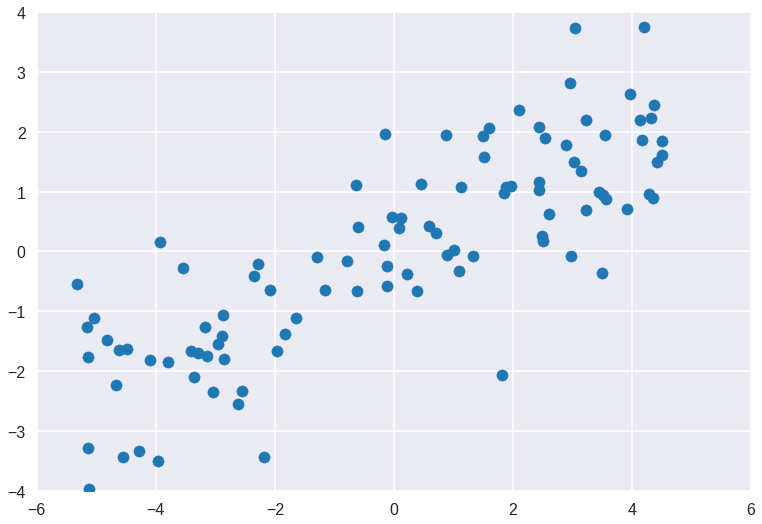

In [14]:
# For data set # 1:

# step 1
X_2d_centered = X_2d - np.mean(X_2d, axis=0)
plt.scatter(X_2d_centered[:,0], X_2d_centered[:,1])
plt.ylim((-4,4))
plt.xlim((-6,6))
plt.show()

We see that the data is now centered on the origin.
Now compute the transformation:

In [18]:
# Step 2.
Cov = np.dot(np.transpose(X_2d_centered), X_2d_centered)
print("Covariance matrix:")
print(Cov)

#Step 3
Eigvals, W = np.linalg.eig(Cov)
print("\nEigenvalues:")
print(Eigvals)
print("\nEigenvectors (columns)")
print(W)
print("\nCheck that eigenvectors are orthogonal (<w1,w2>=0):")
print(np.dot(W[:,0],W[:,1]))

print('\nVarience in the first principal component: {}, varience in the second principal component: {}'.format(Eigvals[0]/np.sum(Eigvals), Eigvals[1]/np.sum(Eigvals) ))

Covariance matrix:
[[936.50221689 426.26348498]
 [426.26348498 287.34004272]]

Eigenvalues:
[1147.69481404   76.14744557]

Eigenvectors (columns)
[[ 0.89605176 -0.44394959]
 [ 0.44394959  0.89605176]]

Check that eigenvectors are orthogonal (<w1,w2>=0):
0.0

Varience in the first principal component: 0.9377800161979029, varience in the second principal component: 0.06221998380209714


Let's plot the eigenvectors in comparison to the data

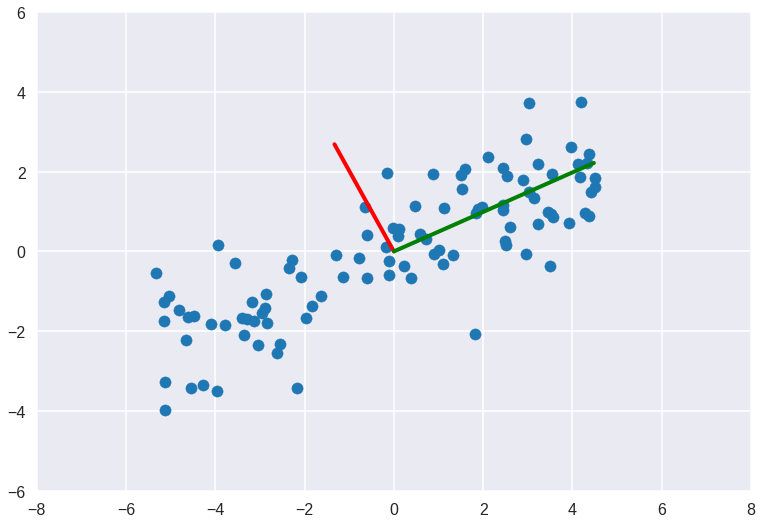

In [19]:
plt.scatter(X_2d_centered[:,0], X_2d_centered[:,1])
plt.plot([0, W[0][1]*3],[0, W[1][1]*3],'r',linewidth=4)
plt.plot([0, W[0][0]*5],[0, W[1][0]*5],'g',linewidth=4)
plt.ylim((-6,6))
plt.xlim((-8,8))
plt.show()

Now we will apply the transformation to the data and plot the data in the new space. We flip the matrix W and corresponding eigenvalues so that they are ordered the same way as in the theory.

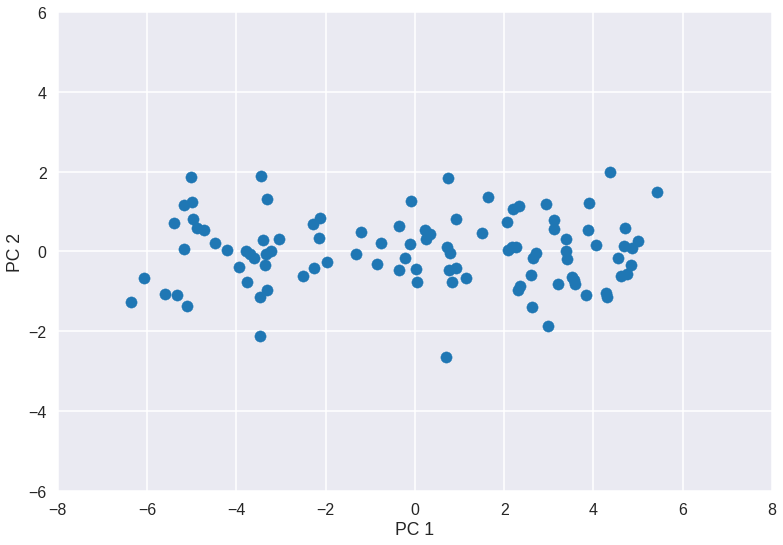

In [20]:
#Step 4
#W = np.fliplr(W)
Eigvals = Eigvals[::-1]
X_2d_transformed = np.dot(X_2d_centered, W)
plt.scatter(X_2d_transformed[:,0], X_2d_transformed[:,1])
plt.ylim((-6,6))
plt.xlim((-8,8))
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

Let's compare our naive implementation to the PCA implementation from sklearn

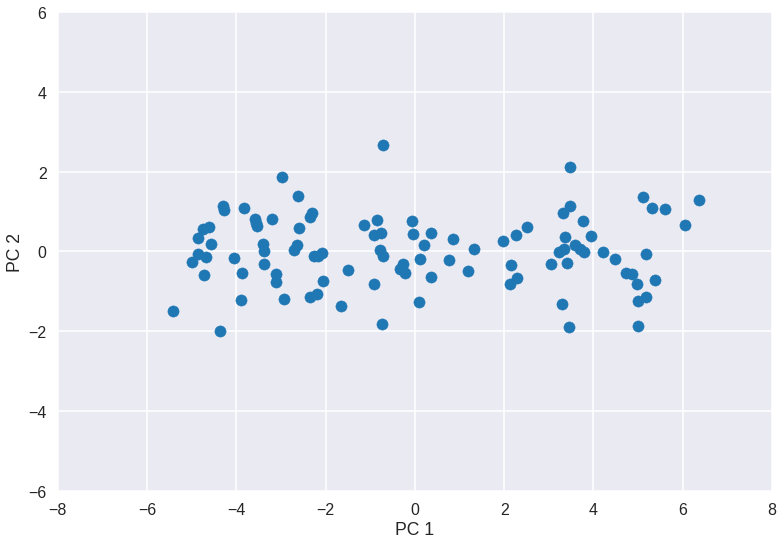

In [21]:
from sklearn.decomposition import PCA 

skl_PCA = PCA(n_components = 2).fit(X_2d) ## fit the data to receive eigenvectors of covariance matrix
skl_X_2d_transformed = skl_PCA.transform(X_2d) ## apply a transformation

plt.scatter(skl_X_2d_transformed[:,0], skl_X_2d_transformed[:,1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.ylim((-6,6))
plt.xlim((-8,8))
plt.show()

Looks identical (up to a left-right or up-down flip)! 

We will now truncate the data to one dimension and see how it looks. It's called a simple PCA dimensionality reduction.

In [22]:
print(skl_PCA.explained_variance_ratio_)

[0.93778002 0.06221998]


We notice that >90% of variance is in the first principal component

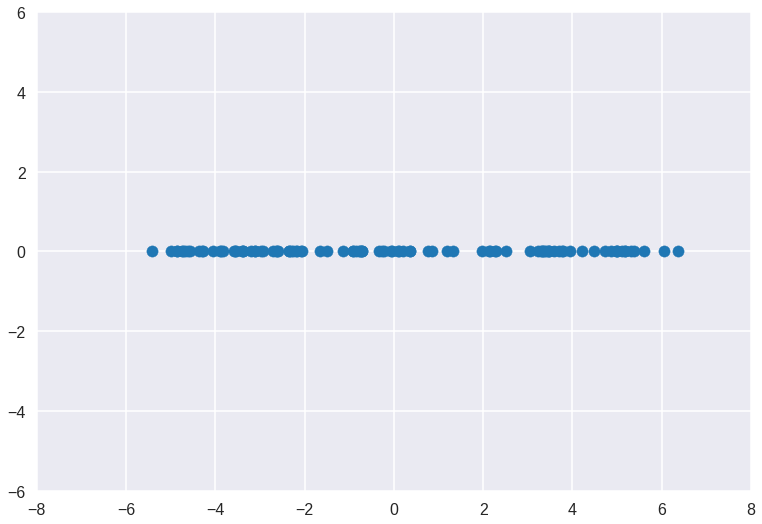

In [23]:
plt.scatter(skl_X_2d_transformed[:,0] , np.zeros(shape=skl_X_2d_transformed[:,0].shape))
plt.ylim((-6,6))
plt.xlim((-8,8))
plt.show()

## Exercise 5.1

Perform principal component analysis on the 1000 points of MNIST data set. It's already contained in the memory of the Jupyter Notebook under variable `X`. `Y` contains the label of each handwritten digit, i.e. the number, or the class. [Documentation on sklearn PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) 
1. Plot the total variance vs the number of PC. **Hint**: variable `explained_variance_ratio_` may be useful.
2. Use the first two component to represent MNIST data set in two dimensions on a scatter plot. 
3. Show the image of first first principal eigenvector. **Hint**: variable `components_` and function `reshape()` might be useful.


## 6. Multidimensional Scaling (MDS) <a id='l_mds'></a>

#### Metric MDS
Setup:
- Suppose one has $p$ samples of N-dimensional data points, $x_i\in\mathbb{R}^N$
- Store these samples rowwise as $X\in\mathbb{R}^{p\,\times\,N}$
- We call this the original data matrix, or simply the data
- Assumption: there is a meaningful metric (e.g. Euclidean distance) on the data space (high dim)
- Assumption: there is a meaningful metric (e.g. Euclidean distance) on the latent space (low dim)

Goal:
- Given N-dim data $X$, a metric $d(\cdot,\cdot)$ on $\mathbb{R}^N$, a target dimension $k<N$, and a metric $g(\cdot,\cdot)$ on $\mathbb{R}^k$
- Find an embedding $Y\in\mathbb{R}^{k\,\times\,p}$ (i.e. a $y_i\in\mathbb{R}^k$ for each $x_i\in\mathbb{R}^N$) such that distances $d_{ij}$, $g_{ij}$ are preserved between representations

Objective function: $$Y^\ast=\operatorname*{arg\,min}_Y {\sum_{i<j}{\left|d_{ij}\left(X\right)-g_{ij}\left(Y\right)\right|}}$$

Let's not invent the wheel and use MDS implementation in Python:

In [24]:
from sklearn.manifold import MDS
from scipy.spatial.distance import pdist, squareform
# compute MDS embedding (2D)
# Docs: http://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html

Can we predict the outcome of MDS from 2D to 2D?

In [25]:
## First, we should find pairwise distances. 
D_compressed = pdist(X_2d, metric='euclidean') # n*(n-1)/2 size
D = squareform(D_compressed)

In [26]:
D.shape

(100, 100)

![](https://www.displayr.com/wp-content/uploads/2018/04/Distance-Matrix.png)

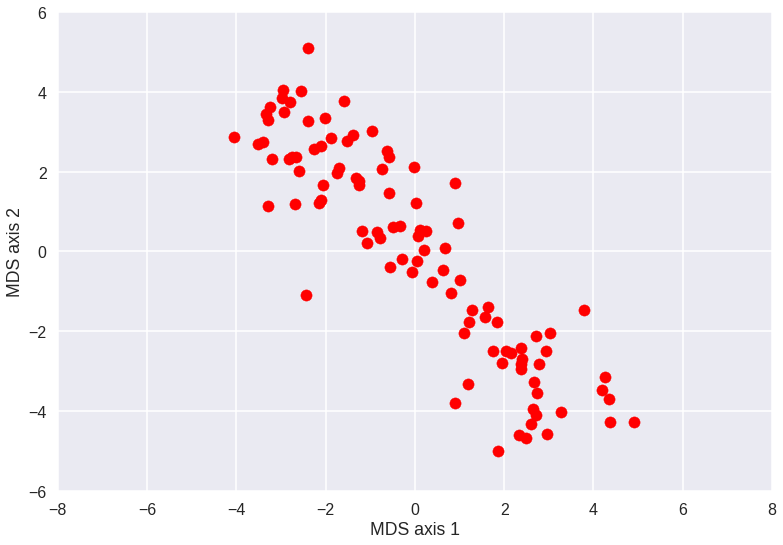

In [27]:
mds_2d = MDS(n_components=2, dissimilarity='precomputed', n_jobs=-1 ).fit_transform(D)
plt.scatter(mds_2d[:,0], mds_2d[:,1], color='red')
plt.ylim((-6,6))
plt.xlim((-8,8))
plt.xlabel('MDS axis 1')
plt.ylabel('MDS axis 2')
plt.show()

Restores original coordinates up to a flip...

What about high dimensional data?

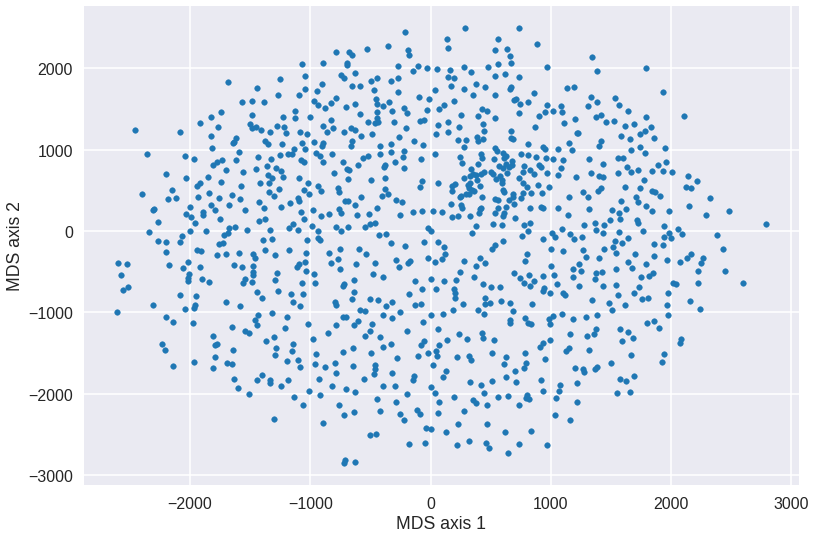

In [28]:
mds_X = MDS(n_components=2, dissimilarity='euclidean', n_jobs=4).fit_transform(X) ## distances will be computed

plt.scatter(mds_X[:,0], mds_X[:,1], marker='.')
plt.xlabel('MDS axis 1')
plt.ylabel('MDS axis 2')
plt.show()

This is what we get as an output of the algorithm

In [30]:
mds_X.shape

(1000, 2)

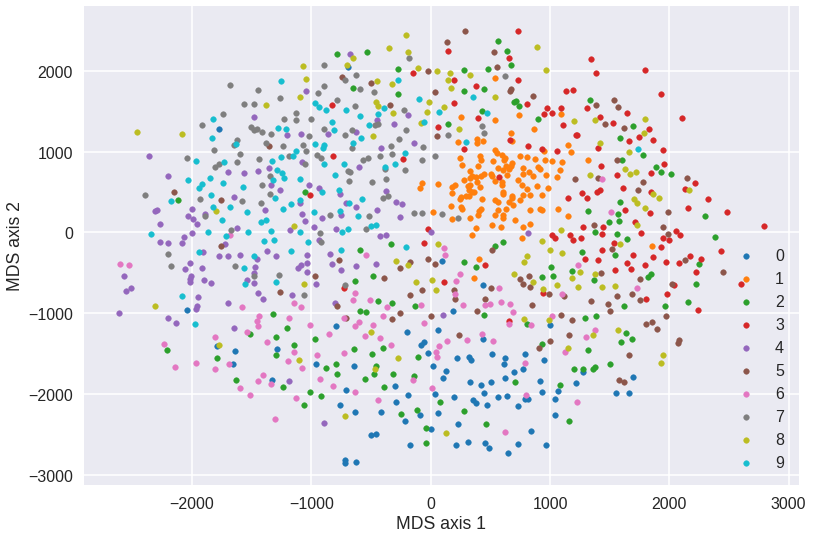

In [31]:
for label in set(Y):
    mask = Y==label
    plt.scatter(mds_X[:,0][mask], mds_X[:,1][mask], marker = '.', label = label)
plt.legend()
plt.xlabel('MDS axis 1')
plt.ylabel('MDS axis 2')
plt.show()

## Exercise 6.1. 
Find the relative coordinates (sketch of the map) of the European cities knowing only pairwise distances between them. **Remember that MDS embedding may require rotation and/or horizontal and vertical flip.** You should get relative locations similar to these:
![](pics/europe.jpg)

In [33]:
import pandas as pd
# Pairwise distance between European cities
url = 'https://raw.githubusercontent.com/neurospin/pystatsml/master/datasets/eurodist.csv'
df = pd.read_csv(url)
print(df.iloc[:7, :7])
print()
## Array with cities:
city = np.array(df["city"])

## Squareform distance matrix
D = np.array(df.iloc[:, 1:]) 
print(D.shape)
print()
print(city)

         city  Athens  Barcelona  Brussels  Calais  Cherbourg  Cologne
0      Athens       0       3313      2963    3175       3339     2762
1   Barcelona    3313          0      1318    1326       1294     1498
2    Brussels    2963       1318         0     204        583      206
3      Calais    3175       1326       204       0        460      409
4   Cherbourg    3339       1294       583     460          0      785
5     Cologne    2762       1498       206     409        785        0
6  Copenhagen    3276       2218       966    1136       1545      760

(21, 21)

['Athens' 'Barcelona' 'Brussels' 'Calais' 'Cherbourg' 'Cologne'
 'Copenhagen' 'Geneva' 'Gibraltar' 'Hamburg' 'Hook of Holland' 'Lisbon'
 'Lyons' 'Madrid' 'Marseilles' 'Milan' 'Munich' 'Paris' 'Rome' 'Stockholm'
 'Vienna']


In [ ]:
## Write your code here

## 7. Other dimensionality reduction techniques: t-SNE, UMAP

In [ ]:
from sklearn.manifold import TSNE
import umap

### [t-SNE](https://lvdmaaten.github.io/tsne/) 

In [ ]:
tsne_2d = TSNE(n_components=2).fit_transform(X)

plt.scatter(tsne_2d[:,0], tsne_2d[:,1], marker='.')
plt.show()

Show with labels:

In [ ]:
for label in set(Y):
    mask = Y==label
    plt.scatter(tsne_2d[:,0][mask], tsne_2d[:,1][mask], marker = '.', label = label)   #, color =  label + 1) #, label = str(label))
plt.legend()
plt.show()

### [UMAP](https://github.com/lmcinnes/umap)

In [ ]:
umap_2d = umap.UMAP(n_components=2).fit_transform(X)

plt.scatter(umap_2d[:,0], umap_2d[:,1], marker='.', color='blue')
plt.show()

Show with labels:

In [ ]:
for label in set(Y):
    mask = Y==label
    plt.scatter(umap_2d[:,0][mask], umap_2d[:,1][mask], marker = '.', label = label)   #, color =  label + 1) #, label = str(label))
plt.legend()
plt.show()

In [ ]:
pca_analysis = PCA().fit(X)
pca_X = pca_analysis.transform(X)
#1
variance = np.cumsum(pca_analysis.explained_variance_ratio_)
number_of_PC = np.arange(1, len(variance)+1)
plt.plot(number_of_PC, variance, 'g-')
plt.show()

#2
for label in set(Y):
    mask = Y==label
    plt.scatter(pca_X[:,0][mask], pca_X[:,1][mask], marker = '.', label = label)   #, color =  label + 1) #, label = str(label))
plt.legend()
plt.show()

#3
plt.imshow(pca_analysis.components_[0].reshape(28,28), cmap='gray')
plt.show()
